In [1]:
import pandas as pd

In [2]:
# load training csv
df_train = pd.read_csv('train.csv')

In [3]:
# get 1st few rows of training csv
print(df_train.head())

     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  


In [4]:
# load testing csv
df_test = pd.read_csv('test.csv')

In [5]:
# print first few rows of testing csv
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None


In [6]:
# get general info of test csv
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None


In [7]:
# general info of test csv
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB
None


In [8]:
# get where null vals are
df_train.isnull().any()

image_name                       False
patient_id                       False
sex                               True
age_approx                        True
anatom_site_general_challenge     True
diagnosis                        False
benign_malignant                 False
target                           False
dtype: bool

In [9]:
# basic stats for training set
print(df_train.describe())

         age_approx        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.131603
min        0.000000      0.000000
25%       40.000000      0.000000
50%       50.000000      0.000000
75%       60.000000      0.000000
max       90.000000      1.000000


In [10]:
# unique patient ids
print(df_train['patient_id'].unique().shape[0])

2056


In [11]:
# counts for each column
for col in df_train.columns:
    print(df_train[col].value_counts())


ISIC_7562708    1
ISIC_6344673    1
ISIC_6286876    1
ISIC_2659591    1
ISIC_8704926    1
               ..
ISIC_0929517    1
ISIC_2509046    1
ISIC_6684371    1
ISIC_0275783    1
ISIC_6546981    1
Name: image_name, Length: 33126, dtype: int64
IP_4938382    115
IP_4382720    115
IP_4479736    115
IP_7279968    115
IP_0656529    114
             ... 
IP_6031322      3
IP_7271570      3
IP_3094561      3
IP_8593932      3
IP_8335299      2
Name: patient_id, Length: 2056, dtype: int64
male      17080
female    15981
Name: sex, dtype: int64
45.0    4466
50.0    4270
55.0    3824
40.0    3576
60.0    3240
35.0    2850
65.0    2527
30.0    2358
70.0    1968
25.0    1544
75.0     981
20.0     655
80.0     419
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64
torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype

In [12]:
# one of the tfrec files... this means i can use tfrecs in the model and match it up with metadata
print(df_train.loc[df_train['image_name'] == 'ISIC_3139230'])

         image_name  patient_id   sex  age_approx  \
10129  ISIC_3139230  IP_3776544  male        45.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  
10129               lower extremity     nevus           benign       0  


In [13]:
# delete column since it is basically same as target
del df_train['benign_malignant']

In [14]:
# print out counts of na in each col
for col in df_train.columns:
    missing_rows = df_train.loc[df_train[col].isna()].shape[0]
    print(col + ': ' + str(missing_rows))

image_name: 0
patient_id: 0
sex: 65
age_approx: 68
anatom_site_general_challenge: 527
diagnosis: 0
target: 0


In [15]:
# 2nd training to manipulate
df_train2 = df_train.copy()

In [16]:
# drop na rows in this col - eliminates too much data - will replace with mode instead
df_train2 = df_train2.dropna(axis=0, subset=['anatom_site_general_challenge'])

In [17]:
# mode of this column
df_train2['anatom_site_general_challenge'].mode()

0    torso
dtype: object

In [18]:
# replace null vals in this column with mode
mode = df_train2['anatom_site_general_challenge'].mode()[0]
df_train2['anatom_site_general_challenge'].fillna(mode, inplace=True)


In [19]:
df_train2['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [20]:
for col in df_train2.columns:
    missing_rows = df_train2.loc[df_train2[col].isna()].shape[0]
    print(col + ': ' + str(missing_rows))

image_name: 0
patient_id: 0
sex: 65
age_approx: 68
anatom_site_general_challenge: 0
diagnosis: 0
target: 0


In [21]:
df3 = df_train2.copy()

In [22]:
df3 = df3.dropna(axis=0, subset=['age_approx'])
for col in df3.columns:
    missing_rows = df3.loc[df3[col].isna()].shape[0]
    print(col + ': ' + str(missing_rows))
print(df3['target'].value_counts())

image_name: 0
patient_id: 0
sex: 0
age_approx: 0
anatom_site_general_challenge: 0
diagnosis: 0
target: 0
0    31956
1      575
Name: target, dtype: int64


In [23]:
print(df3.isnull().any())

image_name                       False
patient_id                       False
sex                              False
age_approx                       False
anatom_site_general_challenge    False
diagnosis                        False
target                           False
dtype: bool


In [24]:
def cleanData(df):
    # delete this col because its the same as target
    if 'benign_malignant' in df.columns:
        del df['benign_malignant']
    
    # replace NA in this col with mode
    mode = df['anatom_site_general_challenge'].mode()[0]
    df['anatom_site_general_challenge'].fillna(mode, inplace=True)
    
    # drop NA age and sex
    df = df.dropna(axis=0, subset=['age_approx'])
    
    return df

In [25]:
df_train = cleanData(df_train)

In [26]:
for col in df_train.columns:
    print(df_train[col].value_counts())

ISIC_7562708    1
ISIC_5442452    1
ISIC_6122799    1
ISIC_0813156    1
ISIC_6392089    1
               ..
ISIC_0929517    1
ISIC_2509046    1
ISIC_6684371    1
ISIC_0275783    1
ISIC_6546981    1
Name: image_name, Length: 33058, dtype: int64
IP_4382720    115
IP_4938382    115
IP_4479736    115
IP_7279968    115
IP_0656529    114
             ... 
IP_2375994      3
IP_8590724      3
IP_3324603      3
IP_5109559      3
IP_8335299      2
Name: patient_id, Length: 2053, dtype: int64
male      17080
female    15978
Name: sex, dtype: int64
45.0    4466
50.0    4270
55.0    3824
40.0    3576
60.0    3240
35.0    2850
65.0    2527
30.0    2358
70.0    1968
25.0    1544
75.0     981
20.0     655
80.0     419
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64
torso              17352
lower extremity     8399
upper extremity     4963
head/neck           1845
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype

In [27]:
print(df_test.isna().any())

image_name                       False
patient_id                       False
sex                              False
age_approx                       False
anatom_site_general_challenge     True
dtype: bool


In [28]:
for col in df_test.columns:
    missing_rows = df_test.loc[df_test[col].isna()].shape[0]
    print(col + ': ' + str(missing_rows))

image_name: 0
patient_id: 0
sex: 0
age_approx: 0
anatom_site_general_challenge: 351


In [29]:
print(df_test['anatom_site_general_challenge'].mode()[0])

torso


In [30]:
df_test = cleanData(df_test)

In [31]:
print(df_test.isna().any())

image_name                       False
patient_id                       False
sex                              False
age_approx                       False
anatom_site_general_challenge    False
dtype: bool


In [32]:
for col in df_test.columns:
    print(df_test[col].value_counts())

ISIC_5415765    1
ISIC_6438534    1
ISIC_9034623    1
ISIC_9747254    1
ISIC_6919934    1
               ..
ISIC_1537434    1
ISIC_7343497    1
ISIC_5264406    1
ISIC_9723994    1
ISIC_0879986    1
Name: image_name, Length: 10982, dtype: int64
IP_3579794    240
IP_6877747    108
IP_4288676     93
IP_7746230     90
IP_2848061     80
             ... 
IP_5235058      3
IP_3028999      3
IP_9801325      3
IP_6398288      3
IP_4150574      3
Name: patient_id, Length: 690, dtype: int64
male      6255
female    4727
Name: sex, dtype: int64
45.0    1587
40.0    1452
55.0    1265
50.0    1230
35.0    1032
60.0    1032
70.0     815
65.0     756
30.0     702
25.0     298
80.0     207
75.0     201
20.0     187
85.0     156
15.0      41
90.0      14
10.0       7
Name: age_approx, dtype: int64
torso              6198
lower extremity    2501
upper extremity    1573
head/neck           576
palms/soles         108
oral/genital         26
Name: anatom_site_general_challenge, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
np.random.seed(42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001447E53CF48>,
      dtype=object)

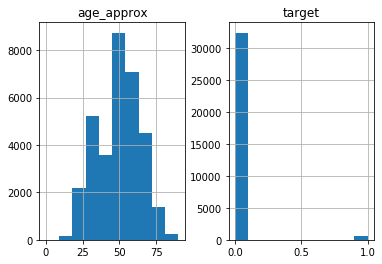

In [35]:
df_train.hist()

(2053,)


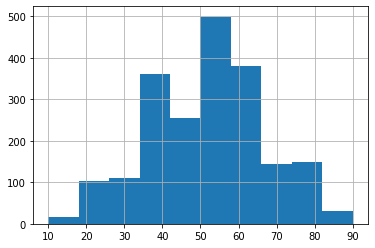

In [36]:
df2 = df_train.drop_duplicates(subset=['patient_id'])
df2['age_approx'].hist()
print(df2['patient_id'].shape)
#df_train['age_approx'].hist()

Text(0.5, 0, 'Age')

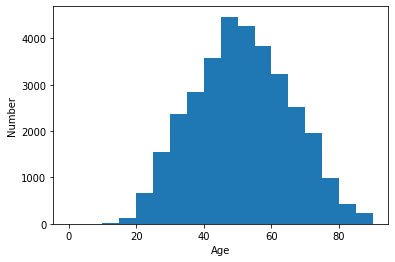

In [37]:
num_bins = df_train['age_approx'].unique().shape[0]

x = np.random.normal(size=1000)
plt.hist(df_train['age_approx'], bins=df_train['age_approx'].unique().shape[0])
plt.ylabel('Number')
plt.xlabel('Age')

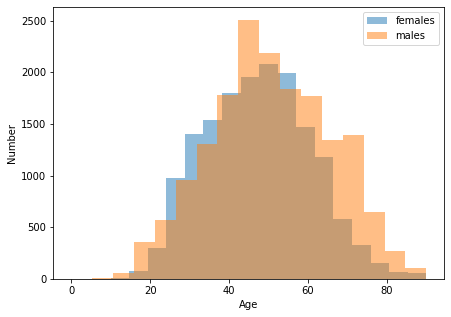

In [38]:
import random
import numpy
from matplotlib import pyplot

#bins = numpy.linspace(-10, 10, 100)
females = df_train.loc[df_train['sex'].str.match("female")]
males = df_train.loc[df_train['sex'].str.match("male")]

bins = df_train.loc[df_train['sex'].str.match("female")]['age_approx'].unique().shape[0]
#binsmale = df_train.loc[df_train['sex'].str.match("male")].unique().shape[0]

plt.figure(figsize=(7, 5))

plt.hist(females['age_approx'], bins, alpha=0.5, label='females')
plt.hist(males['age_approx'], bins, alpha=0.5, label='males')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()


Text(0, 0.5, 'Number')

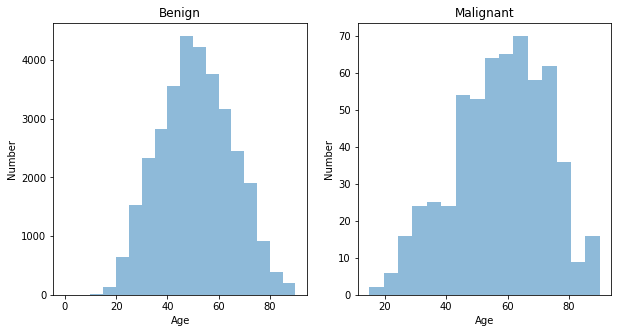

In [39]:
benign = df_train.loc[df_train['target'] == 0]
malignant = df_train.loc[df_train['target'] == 1]

binsbenign = benign['age_approx'].unique().shape[0]
binsmalignant = malignant['age_approx'].unique().shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(benign['age_approx'], binsbenign, alpha=0.5, label='benign')
ax1.set_title('Benign')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number')

ax2.hist(malignant['age_approx'], binsmalignant, alpha=0.5, label='malignant')
ax2.set_title('Malignant')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number')

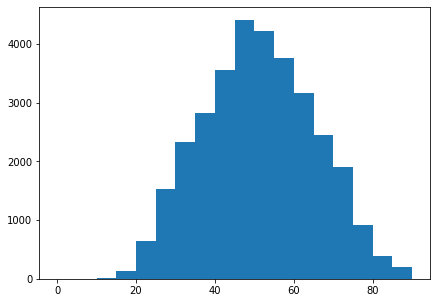

In [40]:
df_train.loc[df_train['target'] == 0]['age_approx'].\
hist(bins=benign['age_approx'].unique().shape[0], figsize=(7, 5)).grid(False)

In [41]:
print(df_train.head())

     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis  target  
0   unknown       0  
1   unknown       0  
2     nevus       0  
3   unknown       0  
4   unknown       0  


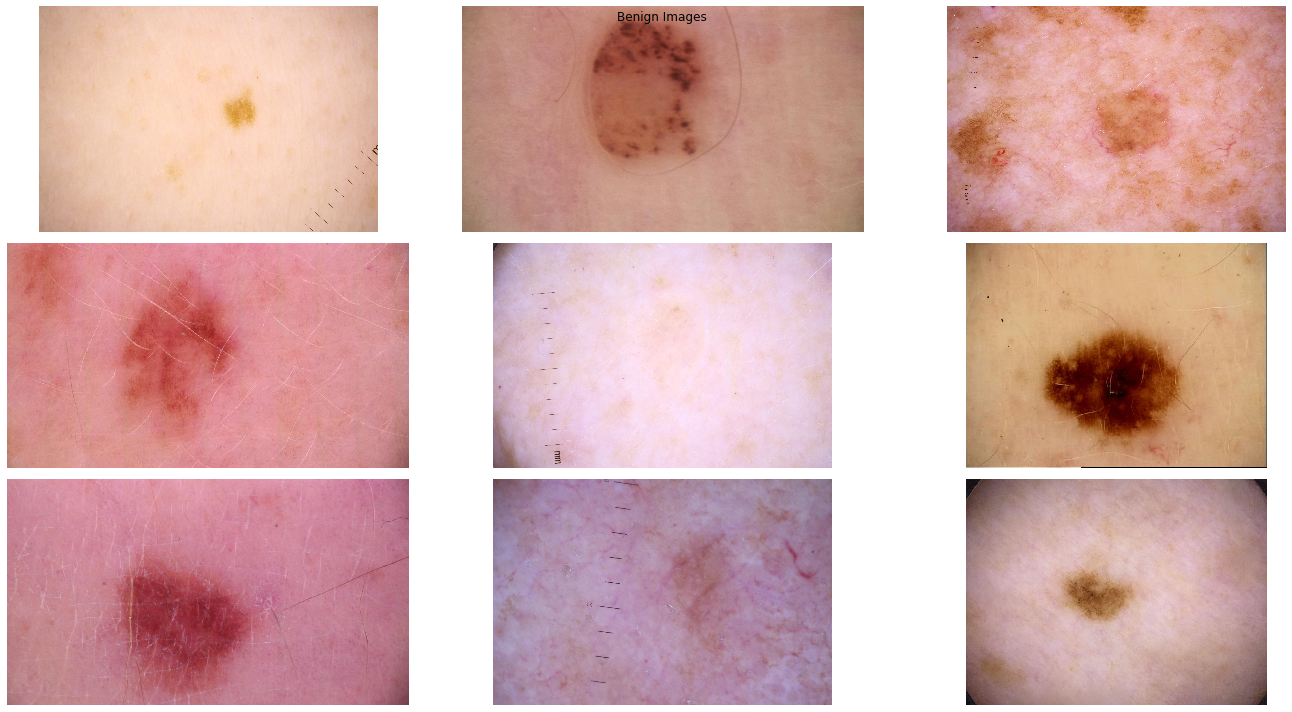

In [42]:
images = benign['image_name'].values
random_images = np.random.choice(images, 9)
random_images = [x+'.jpg' for x in random_images]

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    image = plt.imread('jpeg/train/' + random_images[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.suptitle('Benign Images')
plt.tight_layout()
plt.show()

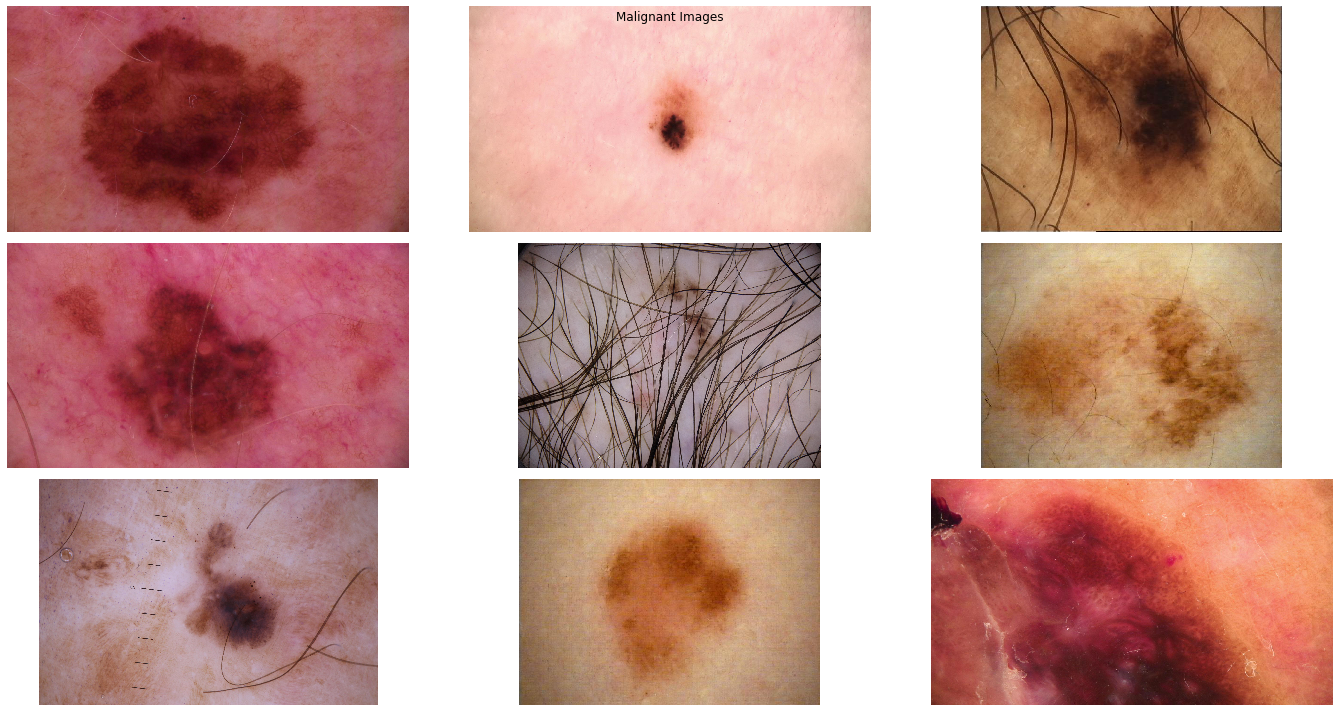

In [43]:
images = malignant['image_name'].values
random_images = np.random.choice(images, 9)
random_images = [x+'.jpg' for x in random_images]

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    image = plt.imread('jpeg/train/' + random_images[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.suptitle('Malignant Images')
plt.tight_layout()
plt.show()

Image dimensions:  (1936, 2592)
Maximum pixel value : 219.0 ; Minimum pixel value:0.0
Mean value of the pixels : 147.5 ; Standard deviation : 34.0


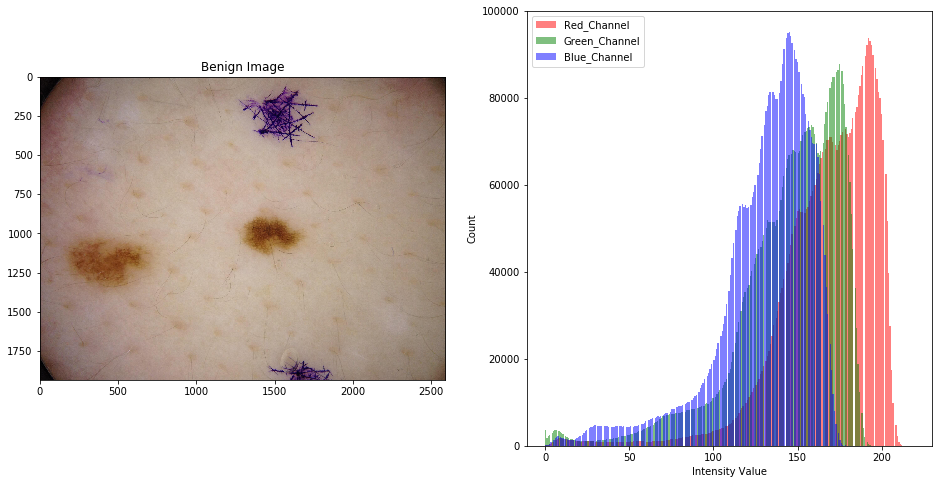

In [44]:
# code from https://www.kaggle.com/parulpandey/melanoma-classification-eda-starter
f = plt.figure(figsize=(16,8))
f.add_subplot(1, 2, 1)

sample_img = benign['image_name'][7]+'.jpg'
raw_image = plt.imread('jpeg/train/' + sample_img)
plt.imshow(raw_image, cmap='gray')

plt.title('Benign Image')
print(f"Image dimensions:  {raw_image.shape[0],raw_image.shape[1]}")
print(f"Maximum pixel value : {raw_image.max():.1f} ; Minimum pixel value:{raw_image.min():.1f}")
print(f"Mean value of the pixels : {raw_image.mean():.1f} ; Standard deviation : {raw_image.std():.1f}")

f.add_subplot(1,2, 2)

#_ = plt.hist(raw_image.ravel(),bins = 256, color = 'orange',)
_ = plt.hist(raw_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

91       ISIC_0149568
235      ISIC_0188432
314      ISIC_0207268
399      ISIC_0232101
459      ISIC_0247330
             ...     
32969    ISIC_9955163
33000    ISIC_9963177
33014    ISIC_9967383
33050    ISIC_9978107
33117    ISIC_9998682
Name: image_name, Length: 584, dtype: object
Image dimensions:  (480, 640)
Maximum pixel value : 221.0 ; Minimum pixel value:0.0
Mean value of the pixels : 108.5 ; Standard deviation : 47.2


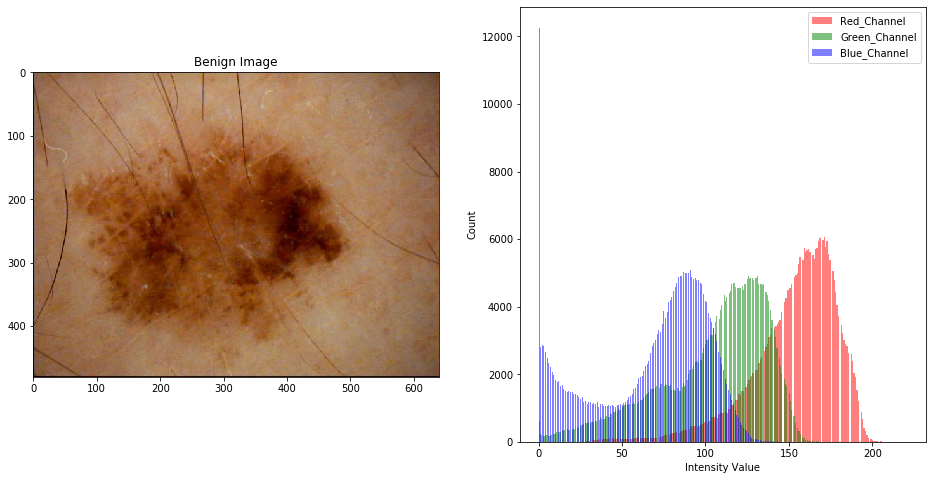

In [45]:
# code from https://www.kaggle.com/parulpandey/melanoma-classification-eda-starter
f = plt.figure(figsize=(16,8))
f.add_subplot(1, 2, 1)
print(malignant['image_name'])

sample_img = malignant['image_name'][32969]+'.jpg'
raw_image = plt.imread('jpeg/train/' + sample_img)
plt.imshow(raw_image, cmap='gray')

plt.title('Benign Image')
print(f"Image dimensions:  {raw_image.shape[0],raw_image.shape[1]}")
print(f"Maximum pixel value : {raw_image.max():.1f} ; Minimum pixel value:{raw_image.min():.1f}")
print(f"Mean value of the pixels : {raw_image.mean():.1f} ; Standard deviation : {raw_image.std():.1f}")

f.add_subplot(1,2, 2)

#_ = plt.hist(raw_image.ravel(),bins = 256, color = 'orange',)
_ = plt.hist(raw_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

In [46]:
images = benign['image_name'].values
random_images = np.random.choice(images, 50)
random_images = [x+'.jpg' for x in random_images]

benign_means = np.empty(shape=(1,))
benign_means_channels = []

for image in random_images:
    raw_image = plt.imread('jpeg/train/' + image)
    
    
    benign_means = np.append(benign_means, raw_image.mean())
    """print(np.array([raw_image[:, :, 0],
                    raw_image[:, :, 1],
                    raw_image[:, :, 2]]).shape)"""
    """benign_means = np.append(benign_means, 
                             np.array([raw_image[:, :, 0].mean(), 
                              raw_image[:, :, 1].mean(), 
                              raw_image[:, :, 2].mean()]).mean())"""
    
    benign_means_channels.append(
        [raw_image[:, :, 0].mean(), raw_image[:, :, 1].mean(), raw_image[:, :, 2].mean()])
    

#print(raw_image)
print(benign_means.mean())
benign_means_channels = np.array(benign_means_channels)
#print(benign_means_channels.shape)
print(benign_means_channels.mean(axis=0))

176.30223663330852
[215.00719265 167.0581136  157.41953784]


In [47]:
images = malignant['image_name'].values
random_images = np.random.choice(images, 50)
random_images = [x+'.jpg' for x in random_images]

malignant_means = np.empty(shape=(1,))
malignant_means_channels = []

for image in random_images:
    raw_image = plt.imread('jpeg/train/' + image)
    
    malignant_means = np.append(malignant_means, raw_image.mean())
    
    malignant_means_channels.append(
        [raw_image[:, :, 0].mean(), raw_image[:, :, 1].mean(), raw_image[:, :, 2].mean()])
    

#print(raw_image)
print(malignant_means.mean())
malignant_means_channels = np.array(malignant_means_channels)
#print(benign_means_channels.shape)
print(malignant_means_channels.mean(axis=0))

143.004843485822
[181.76677847 136.59753537 119.23050723]


In [48]:
print(df_train.loc[df_train['target'] == 1]['diagnosis'].value_counts())

melanoma    584
Name: diagnosis, dtype: int64


In [49]:
print(df_train['diagnosis'].value_counts())

unknown                               27059
nevus                                  5190
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64


In [50]:
import pydicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7715.7833.1589909521800.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

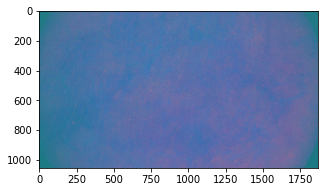

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7740.1353.1589912030514.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

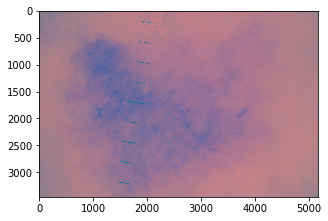

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7173.1618.1589855244890.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

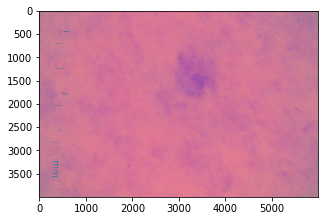

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7178.1083.1589855809814.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

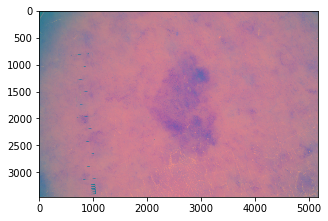

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7173.2221.1589855275512.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

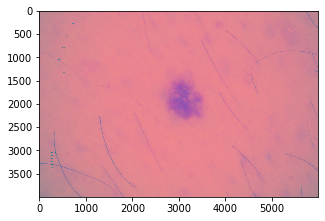

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.8489.1735.1589986843431.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

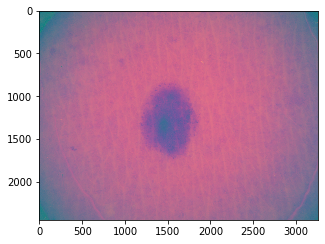

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7622.4155.1589900139529.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

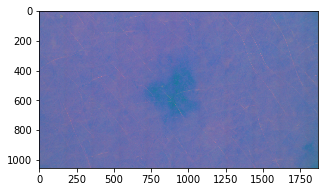

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.8493.1931.1589987306572.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

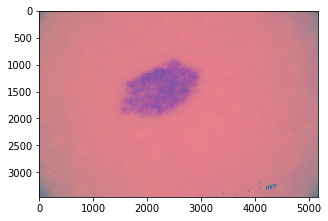

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.7755.1604.1589913471114.1.1.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'OURAETITLE'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 

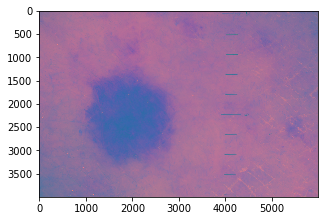

In [51]:
import random
import os

def plot_dicom(data):
    plt.figure(figsize=(5, 10))
    plt.imshow(data.pixel_array)
    plt.show()
    
_, _, dicoms = next(os.walk('train'))

for idx, dicom in enumerate(random.sample(dicoms, 9)):
    dicomdata = pydicom.dcmread('train/' + dicom)
    print(dicomdata)
    plot_dicom(dicomdata)